<a href="https://colab.research.google.com/github/reiple/ds2_data_mining_hw/blob/ckhsmile/DataMining_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 데이터과학 HW

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import uniform, norm, binom, chi2
from scipy.stats import t
from sklearn.model_selection import train_test_split
from collections import Counter

####1.기댓값 계산

######**[sol]**

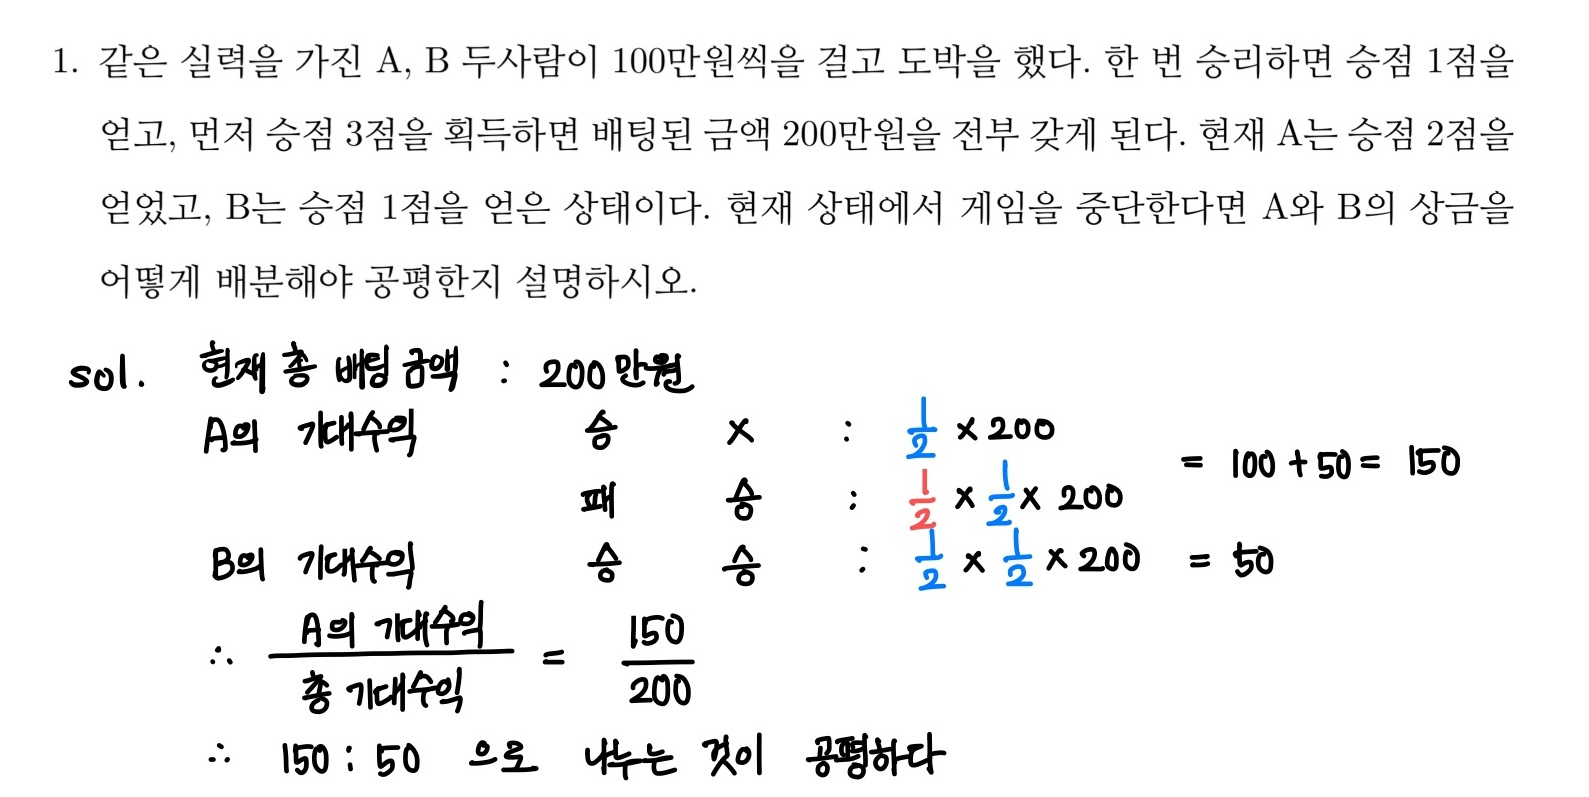

####2.조건부 확률 계산

######**[sol]**

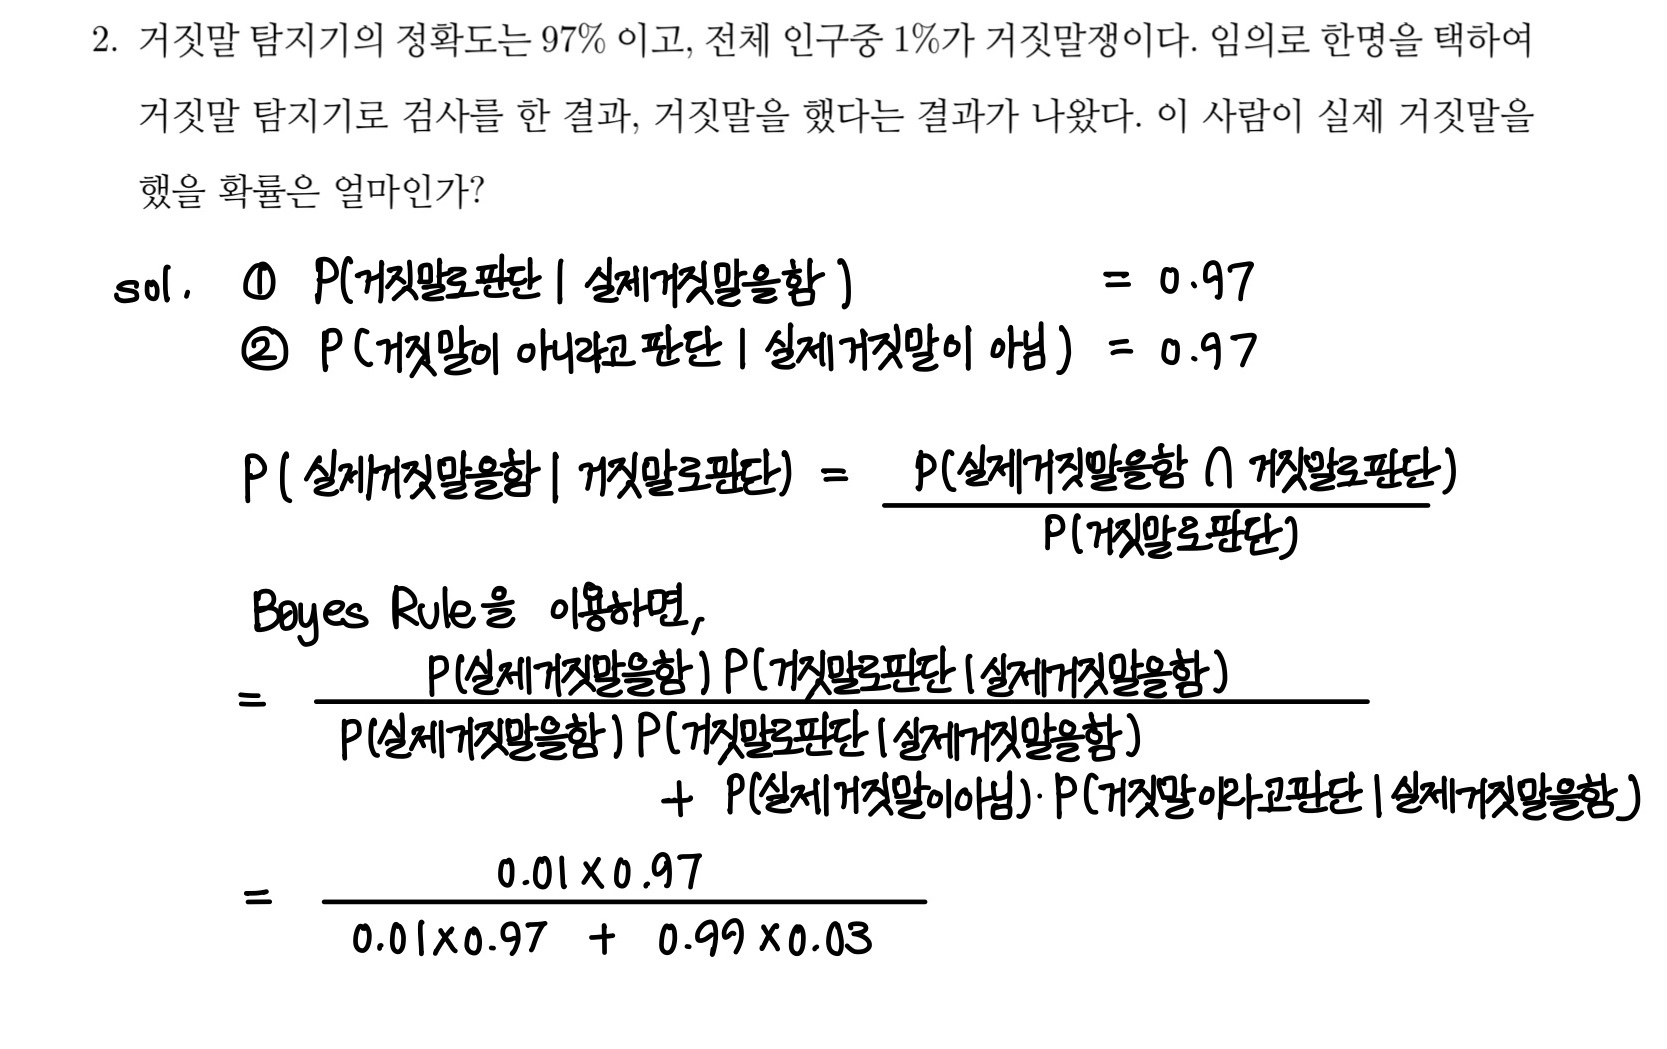

#### 3.임의 표본 추정

각각의 분포에서 표본을 1000개 생성하고, 이 데이터를 이용하여 왜도(skewness), 첨도(kurtosis)를 추정하시오.

표본 평균 $\bar{x} = {1\over{n}}\sum_{i=1}^n x_i$

표본 분산 $s^2 = {1\over{n-1}}\sum_{i=1}^n (x_i - \bar{x})^2$

표본 왜도 = ${1\over{n-1}}\sum_{i=1}^n({{x_i-\bar{x}}\over{s}})^3$

표본 첨도 = ${1\over{n-1}}\sum_{i=1}^n({{x_i-\bar{x}}\over{s}})^4$

---


#####(a) 왜도(Skewness)

왜도(skewness): 분포가 한쪽으로 치우친 정도를 측정하는 통계량

i. **N(0,2)** 과 𝒳(**5**) 표본을 생성한 후, 분포를 그리시오.

ii. 각 분포에서 왜도를 구하시오.

N(0,2)의 왜도: -0.03883129821721662
chi(5)의 왜도: 1.030500025987366


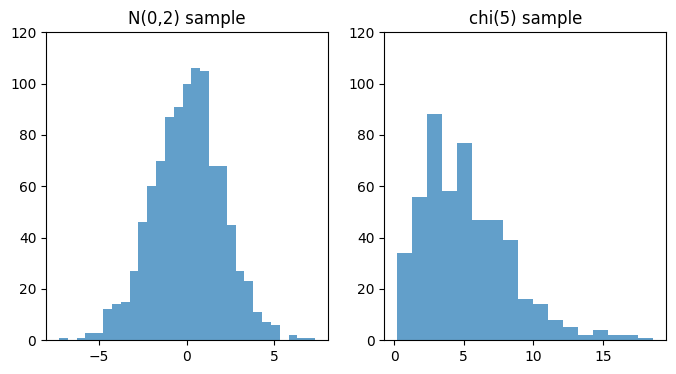

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm, chi2
from scipy.stats import skew


normal_sample = norm.rvs(loc = 0, scale= 2, size=1000)
chi_sample = chi2.rvs(5, size=500)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
ax1.hist(x=normal_sample, bins='auto', alpha=0.7)
ax1.set_title('N(0,2) sample')
ax1.set_ylim([0,120])

ax2.hist(x=chi_sample, bins='auto', alpha=0.7)
ax2.set_title('chi(5) sample')
ax2.set_ylim([0,120])
fig.show()

print(f'N(0,2)의 왜도: {skew(normal_sample)}')
print(f'chi(5)의 왜도: {skew(chi_sample)}')

#####(b) 첨도

첨도(Kurtosis): 이상치가 얼마나 존재하는지를 측정하는 통계량

i. 자유도가 1인 t분포, 자유도가 10인 t분포와 표준정규분포(N(0,1))에서 표본을 생성한 후, 분포를 그리시오.

ii. 각 분포에서 첨도를 구하시오.

df=1 t-distribution kurtosis: 829.5376561341603
df=10 t-distribution kurtosis: 1.3688173098380352
N(0,1) normal distribution kurtosis: 0.02811866436424948


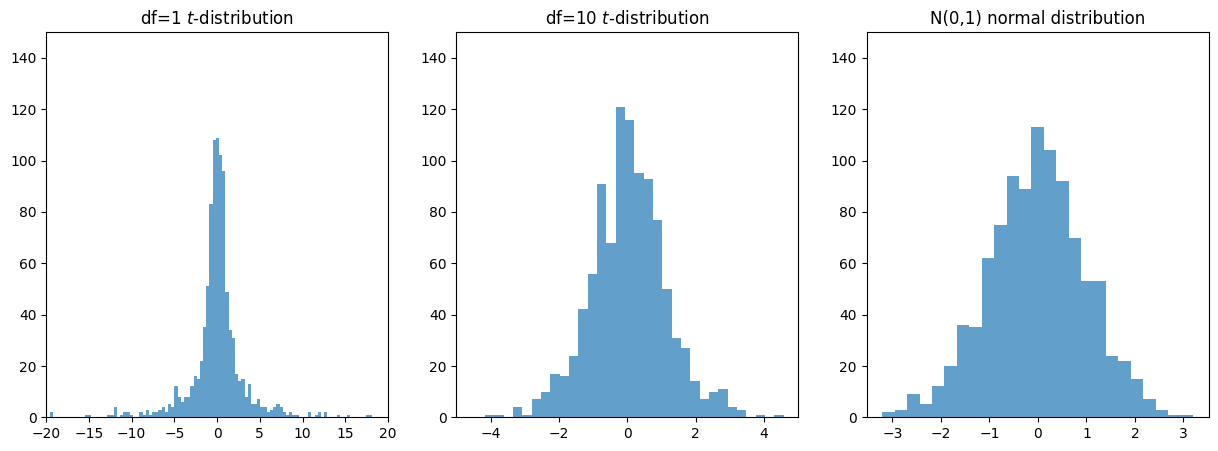

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import kurtosis
from scipy.stats import t, norm

t_sample_1 = t.rvs(df=1, size=1000)
t_sample_10 = t.rvs(df=10, size=1000)
snormal_sample = norm.rvs(loc=0, scale=1, size=1000) # 정규분포

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.set_xlim(-20, 20)
ax1.set_ylim(0, 150)
ax1.hist(t_sample_1, bins='auto', alpha=0.7)
ax1.set_title(r'df=1 $t$-distribution')

ax2.set_xlim(-5, 5)
ax2.set_ylim(0, 150)
ax2.hist(t_sample_10, bins='auto', alpha=0.7)
ax2.set_title(r'df=10 $t$-distribution')

ax3.set_ylim(0, 150)
ax3.hist(snormal_sample, bins='auto', alpha=0.7)
ax3.set_title(r'N(0,1) normal distribution')

fig.show()

print(r'df=1 t-distribution kurtosis:', kurtosis(t_sample_1))
print(r'df=10 t-distribution kurtosis:', kurtosis(t_sample_10))
print(r'N(0,1) normal distribution kurtosis:', kurtosis(snormal_sample))

#### 4.랜덤워크

$X_i \overset{i.i.d}{\sim} U(-1, 1)$ 일 때, $S_n = X_1 + \cdots + X_n$ 인 랜덤워크에 대해서 고려하자.

독립적으로 생성된 두 개의 랜덤워크 $\{S_n : n = 1, \cdots , 10000\}$ 과 $\{S_n' : n = 1, \cdots , 10000\}$ 의 상관계수를 구하시오.

In [4]:
import numpy as np
from scipy.stats import uniform

uniform_sample1 = uniform.rvs(loc = -1, scale = 2, size = 10000)
uniform_sample2 = uniform.rvs(loc = -1, scale = 2, size = 10000)

random_walk1 = np.array([])
random_walk2 = np.array([])

for i in range(10000):
  random_walk1 = np.append(random_walk1, uniform_sample1[0:i+1].sum())
  random_walk2 = np.append(random_walk2, uniform_sample2[0:i+1].sum())

np.corrcoef(random_walk1, random_walk2)

array([[1.        , 0.30149776],
       [0.30149776, 1.        ]])

#### 5.모비율 검정

로또는 45개의 숫자 중에서 6개의 당첨 번호를 추첨한다. 10번의 모의실험을 통해 당첨번호를 추출 한 후, 각 번호가 나올 확률이 동일한지를 검정하려고 한다. 다음의 절차를 따르시오.

(이 때 i번째 공이 당첨번호에 포함될 확률을 $p_i$라고 하자.)

---


(a) 각 번호가 나올 확률이 동일하다고 가정하고 로또 당첨 번호를 10회 추출하시오.

In [5]:
import numpy as np

winning_tickets= [np.random.choice(range(1, 46), size=6, replace=False) for i in range(10)]
winning_tickets

[array([14, 20, 23, 25, 28, 13]),
 array([ 1, 21, 20,  2,  7, 24]),
 array([ 6, 38, 43, 14, 44, 15]),
 array([16, 13, 40, 26, 27, 31]),
 array([ 6, 41, 44, 34,  5, 31]),
 array([24,  1, 39, 23, 12, 17]),
 array([33, 29, 27, 21,  6, 31]),
 array([ 4, 34, 39, 32, 24, 30]),
 array([33, 27, 39, 18,  7, 24]),
 array([ 2, 28, 23, 42, 13, 43])]

(b) 10개의 표본을 통해 각 i번째 공이 당첨 번호에 포함 될 확률 $\hat{p}_i$ 를 추정하시오.

In [6]:
winning_tickets = np.array(winning_tickets).reshape(-1)
count_numbers = np.bincount(winning_tickets)[1:] # np.bincount() : 0부터 시작하는 정수 배열에 대해 각 숫자의 발생 빈도를 계산

# 나오지 않는 숫자가 있을수 있으므로 크기가 45가 되도록 0으로 패딩
if len(count_numbers) < 45:
    count_numbers = np.pad(count_numbers, (0, 45 - len(count_numbers)), mode='constant')

#print(count_numbers)

# 각 i번째 공의 당첨 확률을 계산하여 출력
prob_arr=np.array([])

for i in range(len(count_numbers)):
    prob_arr = np.append(prob_arr, count_numbers[i] / len(winning_tickets))

print(prob_arr)

# for i, prob in enumerate(prob_arr, start=1):
#     print(f"{i}번 공 확률: {prob:.8f}")

# enumerate(iterable, start=1) : 반복 가능한(iterable) 객체(리스트, 튜플, 문자열 등)를 받아 인덱스와 해당 요소를 함께 반환하는 iterator를 생성
#                              : start는 인덱스의 시작값을 의미하며 기본값은 0, 1로 할 경우 실제 데이터는 0부터 있지만 1부터 시작하는것처럼 할수 있음.

[0.03333333 0.03333333 0.         0.01666667 0.01666667 0.05
 0.03333333 0.         0.         0.         0.         0.01666667
 0.05       0.03333333 0.01666667 0.01666667 0.01666667 0.01666667
 0.         0.03333333 0.03333333 0.         0.05       0.06666667
 0.01666667 0.01666667 0.05       0.03333333 0.01666667 0.01666667
 0.05       0.01666667 0.03333333 0.03333333 0.         0.
 0.         0.01666667 0.05       0.01666667 0.01666667 0.01666667
 0.03333333 0.03333333 0.        ]


(c) 각 i에 대해 다음의 검정을 시행하시오. p-value가 0.05보다 작은 경우는 몇 개 있는가?

> $H_0 : p_i = 6/45$ vs $H_1 : p_i > 6/45$

In [7]:
from statsmodels.stats.proportion import proportions_ztest

pval_arr = np.array([])

for i in range(len(count_numbers)):
    z_stats, p_val = proportions_ztest(count_numbers[i], nobs=10, value=6/45, alternative= "larger")
    print(f"{i+1}번째 공 z-stats : {z_stats:.4f}, p-value : {p_val:.4f} ")
    pval_arr = np.append(pval_arr, p_val)

print('p-value가 0.05보다 작은 경우는 ', (pval_arr < 0.05).sum(), '개 입니다.')

1번째 공 z-stats : 0.5270, p-value : 0.2991 
2번째 공 z-stats : 0.5270, p-value : 0.2991 
3번째 공 z-stats : -inf, p-value : 1.0000 
4번째 공 z-stats : -0.3514, p-value : 0.6373 
5번째 공 z-stats : -0.3514, p-value : 0.6373 
6번째 공 z-stats : 1.1501, p-value : 0.1250 
7번째 공 z-stats : 0.5270, p-value : 0.2991 
8번째 공 z-stats : -inf, p-value : 1.0000 
9번째 공 z-stats : -inf, p-value : 1.0000 
10번째 공 z-stats : -inf, p-value : 1.0000 
11번째 공 z-stats : -inf, p-value : 1.0000 
12번째 공 z-stats : -0.3514, p-value : 0.6373 
13번째 공 z-stats : 1.1501, p-value : 0.1250 
14번째 공 z-stats : 0.5270, p-value : 0.2991 
15번째 공 z-stats : -0.3514, p-value : 0.6373 
16번째 공 z-stats : -0.3514, p-value : 0.6373 
17번째 공 z-stats : -0.3514, p-value : 0.6373 
18번째 공 z-stats : -0.3514, p-value : 0.6373 
19번째 공 z-stats : -inf, p-value : 1.0000 
20번째 공 z-stats : 0.5270, p-value : 0.2991 
21번째 공 z-stats : 0.5270, p-value : 0.2991 
22번째 공 z-stats : -inf, p-value : 1.0000 
23번째 공 z-stats : 1.1501, p-value : 0.1250 
24번째 공 z-stats : 1.7213, p-

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/weightstats.py:792: RuntimeWarning: divide by zero encountered in double_scalars
  zstat = value / std


(d) 본페르니 교정을 이용하여, 다중 검정을 시행하시오. p-value가 0.05/45보다 작은 경우는 몇 개 있는가?

> $H_0 : p_i = 6/45, ∀i$ vs $H_1$ : 어떤 i에 대해서 $p_i > 6/45$ 을 만족한다.

In [8]:
print('p-value가 0.05/45 보다 작은 경우는 ', (pval_arr < 0.05/45).sum(), '개 입니다.')

p-value가 0.05/45 보다 작은 경우는  0 개 입니다.


[참고]   
본페르니 교정(Bonferroni correction)은 다중 비교를 할 때 제1종 오류의 확률을 제어하기 위한 방법 중 하나
* 제1종 오류 : 실제로는 차이나 효과가 없는데 데이터의 샘플링 변동 등의 이유로인해 차이나 효과가 있다고 잘못 결론 내리는 오류
* 다중 비교 문제는 여러 개의 독립적인 가설 검정을 동시에 수행할 때 각각의 검정에서 제1종 오류의 위험이 누적되므로  
  이를 제어하지 않으면 전체적인 제1종 오류의 확률이 크게 증가함.  
* 본페르니 교정은 이러한 문제를 해결하기 위한 방법 중 하나로, 원래의 유의수준을 전체 검정 횟수로 나눈 값을 새로운 유의수준으로 사용하는 방법임.

본페르니 교정은 매우 보수적인 방법으로, 이 방법을 사용할 경우
제1종 오류의 위험은 크게 줄어들지만, 제2종 오류의 위험(실제로 차이나 효과가 있지만 그렇지 않다고 결론 내리는 오류)은 증가할 수 있음


#### 6.p-value 계산
스웨인 대 알리바마 재판에서 귀무 가설은 '공정한 배심원 선택' 이고 대립가설은 '불공정한 배심원 선택'이다. 전체 인구 중 26%가 흑인이다. 우리는 100명을 뽑았을 때, 8명의 흑인이 선택되었다는 데이터를 관찰하였다. 이 경우 p-value를 구하여라.

(hint: 이항분포의 누적분포함수 또는 확률질량함수를 이용하시오.)



> $H_0 : \mu = \mu_0$ vs $H_1 : \mu > \mu_0$


검정통계량 $Z = \dfrac{\bar{X} - \mu_0}{\frac{\sigma}{\sqrt{n}}}\sim N(0,1)\; (H_0 \text{가 참일 때})$


z : 실제 관측된 검정통계량 값

P-value = $P(Z > z | H_0)$

p-value : 귀무가설 $H_0$ 하에서 관찰된 검정통계량 값이 귀무가설 $H_0$에 더 반대되는 결과를 관측할 확률을 유의확률이라고 하며, 이는 관측 결과에 의해 귀무가설 $H_0$를 기각할 수 있는 최소의 유의수준이다.

In [9]:
from scipy.stats import binom

# 이항 분포의 누적 분포 함수 활용

print('p-value:', binom.cdf(n = 100, p=0.26, k=8))
# 100번의 시행에서 성공 확률이 26%인 이항 분포에서 8번 이하의 성공이 나올 확률
# k: 성공의 횟수, n: 시행 횟수, p: 성공 확률


# 이항 분포의 확률 질량 함수를 활용
p_val = 0
for i in range(9): # 0에서 8번까지이므로.. range(9)로 해야 함.
  p_val += binom.pmf(n=100, p=0.26, k=i)

print(f'p-value: {p_val}')

p-value: 4.73479499788932e-06
p-value: 4.734794997889316e-06


####7.분산이 같기 위한 필요조건

아빠의 키 $Y_i$, 자식의 키 $X_i$의 관계를 $Y_i = βX_i + ϵ_i$라고 하자. (단 $X_i$ 와 $ϵ_i$는 독립이다.)

$Y_i$의 분산과 $X_i$의 분산이 같기 위한 필요조건이 $|β| < 1$ 임을 보이시오.

######**[sol]**
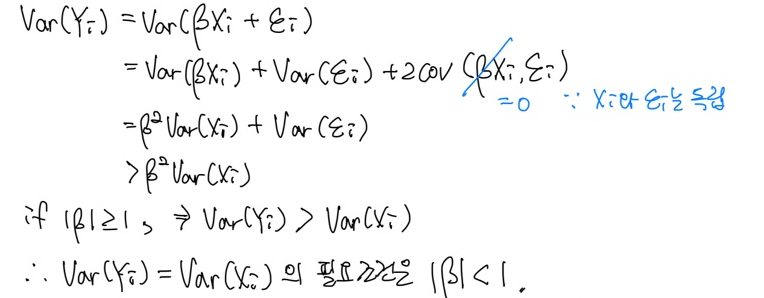

[참고]  
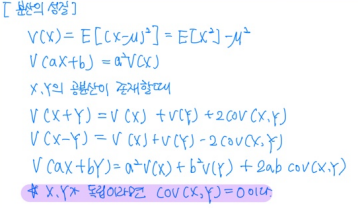

####8.예측 구간 추정

다음의 데이터가 주어졌다고 하자. 이 때, 설명 변수를 $(x_1,x_2)$, 반응 변수를 $y$로 하는 선형회귀모형을 가정하고 $(x_1,x_2) = (0.1,0.2)$일 때, Bootstrap resampling을 통한 예측구간(prediction interval)을 추정하고자 한다.

다음의 식을 만족하는 $[L, U]$을 $x_{new}$일 때, 신뢰도가 $(1-α)%$인 예측 구간이라고 한다.



> $P(L \le x_{new}^T \hat{β} + ϵ ≤ U) = 1 - \alpha$



|#|1|2|3|4|5|6|7|8|9|10
|---|---|---|---|---|---|---|---|---|---|---|
|$y$|5.|7.9|11.2|11.7|8.9|6.8|8.4|8.8|10.1|7.5|
|$x_1$|1.|1.1|1.5|3.|2.4|1.2|2.4|2.9|1.3|2.|
|$x_2$|0.5|2.1|3.|1.5|1.7|1.2|0.2|0.9|2.3|1.|

#####(a) Bootstrap resampling을 이용하여 bootstrap sample을 얻고 이를 이용하여 선형회귀모형의 계수를 추정하시오.

In [10]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

x1 = np.array([1.,1.1,1.5,3.,2.4,1.2,2.4,2.9,1.3,2.])
x2 = np.array([0.5,2.1,3.,1.5,1.7,1.2,0.2,0.9,2.3,1.])
y = np.array([5.,7.9,11.2,11.7,8.9,6.8,8.4,8.8,10.1,7.5])

In [11]:
def bootstrap_sampling():
  rand_idx = np.random.choice(10, 10, replace=True)
  boots_x = np.array([x1[rand_idx], x2[rand_idx]]).T
  boots_y = y[rand_idx]

  boots_x = sm.add_constant(boots_x, has_constant = 'add')
  model = sm.OLS(boots_y, boots_x)

  return model.fit()

In [12]:
result = bootstrap_sampling()
print(result.params)

[1.64627479 1.95806223 2.16309131]


#####(b) 위에서 추정한 모형을 이용하여 $(x_1, x_2) = (0.1, 0.2)$ 일 때의 예측값을 구하시오.

In [13]:
predict_value = result.predict((1, 0.1,0.2))
print("예측값:", predict_value)

예측값: [2.27469927]


#####(c) 위에서 추정한 모형과 bootstrap sample들을 이용하여 잔차들을 구하고, 그 잔차들 중 하나의 값을 랜덤 추출하시오.

In [14]:
res = np.random.choice(result.resid, 1)
print(res)

[-0.47143745]


#####(d) (b)에서 추정한 예측값과 (c)에서 생성된 노이즈를 더한 값을 저장하시오.

In [15]:
print(predict_value + res)

[1.80326183]


#####(e) (a) - (d) 의 과정을 2000번 반복하시오.


In [16]:
def iter2000():
  X = []
  for _ in range(2000):
    result = bootstrap_sampling()
    pred = result.predict([1, 0.1, 0.2])
    res = np.random.choice(result.resid, 1)
    X.append((pred+res)[0])
  return X


predict_values = iter2000()

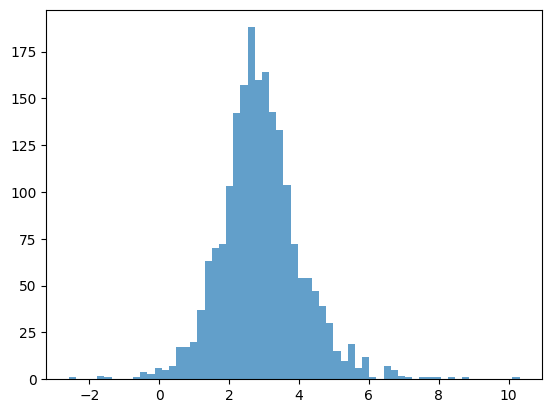

In [17]:
import matplotlib.pyplot as plt

plt.hist(predict_values, bins='auto', alpha=0.7)
plt.show()

(f)
(e) 에서 저장된 2000개의 값들을 이용하여 $(x1, x2) = (0.1, 0.2)$일 때의 95% 예측구간을 구하시오.

In [18]:
from scipy.stats import norm

# 95% 신뢰수준을 갖는 정규분포의 Z 값을 계산
# 양쪽으로 2.5% 씩 취해야 도합 5%가 된다.
z_value = norm.ppf(0.975)

mean_predict = np.mean(predict_values)
stdev = np.std(predict_values)

predict_interval = (mean_predict - z_value * stdev , mean_predict + z_value * stdev)

print("95% 예측 구간:", predict_interval)

95% 예측 구간: (0.6228635610464712, 5.208657146907959)


#### 9.QQ-Plot
문제 8의 Table 1 데이터를 이용하자. 선형 모형의 잔차 ($\hat{\varepsilon }_{i} = y_i - \hat{y}_i$)들을 이용하여 QQ-plot을 그리고 해석하시오.


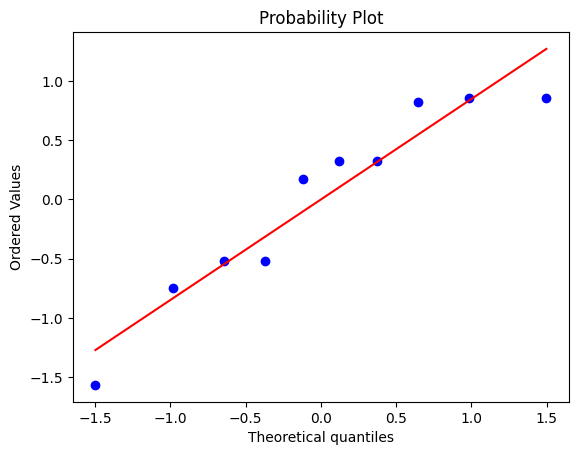

In [19]:
import scipy.stats as stats
import matplotlib.pyplot as plt

olsfit = bootstrap_sampling()
stats.probplot(olsfit.resid, dist="norm", plot= plt)
plt.show()

[참고]   
QQ-plot(Quantile-Quantile Plot)은  
잔차나 데이터의 분포가 정규 분포와 얼마나 유사한지 시각적으로 판단하는 데 사용되는 그래프

만약 QQ-plot 상의 점들이 대각선에 가까이 분포하는 모습을 보인다면, 해당 데이터나 잔차가 정규분포에 근사적으로 따르는 것으로 볼 수 있음.

그러나, 위의 그래프를 봤을때 점들이 계단 모양으로 분포하고 있으므로
잔차는 정규분포를 따른다고 할수 없음.

In [20]:
from scipy.stats import kstest

# 잔차의 정규성을 검증하는 가장 일반적인 콜모고로프-스미르노프 검정(Kolmogorov-Smirnov test) 수행
# H0 : 잔차가 정규 분포를 따른다
ks_statistic, p_value = kstest(olsfit.resid, 'norm')

if p_value > 0.05:
    print(f"p-value가 {p_value:.4f}로 유의수준 0.05보다 크므로 정규분포를 따른다는 귀무가설을 기각할 수 없습니다.")
else:
    print(f"p-value가 {p_value:.4f}로 유의수준 0.05보다 작으므로 정규분포를 따른다는 귀무가설을 기각합니다.")

p-value가 0.7726로 유의수준 0.05보다 크므로 정규분포를 따른다는 귀무가설을 기각할 수 없습니다.


#### 10.차원의 저주
차원의 저주에 대한 모의 실험을 위해 아래의 절차를 따르시오.

#####(a) \( d=1 \) 일때, $X \sim  U(-3,3)$를 따르는 데이터를 50개 생성하시오.

In [21]:
import numpy as np

x = np.random.uniform(-3, 3, size=50)
print(len(x))
print(x)

50
[ 2.78601963 -0.373482    0.83915586  1.01618121  2.53444817 -0.79386717
  1.2876015  -1.92139582 -2.97623407 -1.67052352 -2.25471436  2.63220419
 -0.41329711  1.34985935 -2.61463444 -1.38399088  2.43356465  2.19131814
  2.48059857 -2.87037701  1.98147562  1.49960773 -1.75614997  2.72744997
  2.4008072  -2.1094126   0.2861181  -2.00552366  0.31872212  1.50839223
 -0.88379286  0.30270026  2.28671217  1.21218566  0.19113094 -1.10474233
  0.96564584  1.24304387 -1.79683378  0.68651775 -1.10082778 -2.96751679
  0.52470872  0.3752112  -2.44720082 -1.95272035 -0.41521431 -2.02818203
 -2.75960281  0.68316061]


#####(b) $( X_i > 0 )$ 이면 $( Y_i = 1 )$, 그렇지 않으면 $( Y_i = 0 )$인 데이터를 생성하시오.

In [22]:
y = (x > 0)*1
print(y)

[1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1
 1 0 1 0 0 1 1 0 0 0 0 0 1]


#####(c) 학습데이터와 테스트 데이터의 비율이 0.5가 되도록 나누시오.

In [23]:
from sklearn.model_selection import train_test_split

data_arr = np.c_[x, y]
# np.c_ 함수는 NumPy에서 배열들을 연결하는 함수 중 하나
# 두 개의 배열을 열 방향으로(concatenate along columns) 연결하여 하나의 2차원 배열로 만듦
# c_는 "concatenate along columns"의 약어
df = pd.DataFrame(data_arr)

train_data, test_data = train_test_split(df, test_size = 0.5)

# print("train data size:", train_data.shape)
# print("test data size:",test_data.shape)

#####(d) 학습데이터로 K-NN(K=3) 모형을 학습하고, 테스트 데이터를 이용하여 정확도를 계산하시오.

In [24]:
from sklearn.neighbors import KNeighborsClassifier

# 1) K-NN (K=3) 모델 정의
knn = KNeighborsClassifier(n_neighbors=3)

# 2) train 데이터로 모델 학습(fit)
knn.fit(train_data.iloc[:,:-1], train_data.iloc[:,-1])
# [:, :-1]은 모든 행(:)과 마지막 열을 제외한 모든 열(:-1)을 선택함.

# 3) test 데이터로 정확도 검증
y_pred = knn.predict(test_data.iloc[:,:-1])

# 정확도 계산
accuracy = (y_pred == test_data.iloc[:,-1]).mean()

results = []
results.append((1, accuracy))

print("테스트 데이터 정확도:", accuracy)


테스트 데이터 정확도: 1.0


#####(e) (a) ∼ (d)의 과정을 $( d = 2, \ldots, 40 )$ 까지 반복하고, 정확도를 저장하시오.  
> (d ≥ 2 일 때는, 생성된 $( X_i \sim U(-3, 3)^d )$ 데이터들의 1번째 성분이 0보다 크면 1, 아니면 0으로 레이블링 하시오.)

In [25]:
knn = KNeighborsClassifier(n_neighbors=3)

for d in range(2,41):
  x = np.random.uniform(-3, 3, size=50*d)
  x = x.reshape(50, d)
  y = (x[:,0] > 0)*1

  data_arr = np.c_[x, y]
  df = pd.DataFrame(data_arr)

  train_data, test_data = train_test_split(df, test_size = 0.5)
  knn.fit(train_data.iloc[:,:-1], train_data.iloc[:,-1])

  y_pred = knn.predict(test_data.iloc[:,:-1])
  accuracy = (y_pred == test_data.iloc[:,-1]).mean()

  results.append((d, accuracy))

# 결과를 NumPy 배열로 변환
results = np.array(results)
print(results)

[[ 1.    1.  ]
 [ 2.    1.  ]
 [ 3.    0.88]
 [ 4.    0.88]
 [ 5.    0.84]
 [ 6.    0.76]
 [ 7.    0.76]
 [ 8.    0.68]
 [ 9.    0.8 ]
 [10.    0.76]
 [11.    0.68]
 [12.    0.64]
 [13.    0.76]
 [14.    0.56]
 [15.    0.44]
 [16.    0.72]
 [17.    0.72]
 [18.    0.84]
 [19.    0.64]
 [20.    0.56]
 [21.    0.72]
 [22.    0.88]
 [23.    0.6 ]
 [24.    0.48]
 [25.    0.6 ]
 [26.    0.6 ]
 [27.    0.84]
 [28.    0.6 ]
 [29.    0.56]
 [30.    0.72]
 [31.    0.6 ]
 [32.    0.68]
 [33.    0.6 ]
 [34.    0.56]
 [35.    0.52]
 [36.    0.64]
 [37.    0.68]
 [38.    0.76]
 [39.    0.68]
 [40.    0.52]]


#####(f) X축을  d(차원의 수), Y축을 정확도로 하는 그래프를 그리시오.

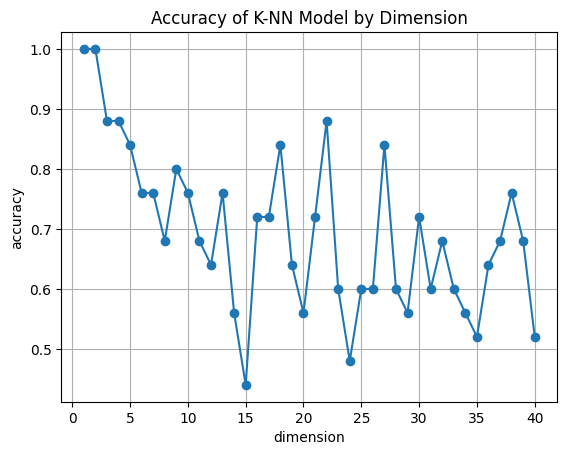

In [26]:
plt.plot(results[:,0], results[:,1], marker='o')

plt.xlabel('dimension')
plt.ylabel('accuracy')
plt.title('Accuracy of K-NN Model by Dimension')
plt.grid(True)
plt.show()

####11.상관관계와 인과관계
상관관계이지만 인과관계가 아닌 예를 쓰시오.

######**[sol]**  
1) 키와 신발 사이즈 : 일반적으로 키가 큰 사람들이 신발 사이즈가 크고, 키가 작은 사람들이 신발 사이즈가 작을 가능성이 높을수는 있지만, 인과 관계는 아님.   
2) 국어 성적과 수학 성적 : 일반적으로 국어 점수가 높은 학생이 수학 성적도 높은 경향을 보이나, 두 과목의 성적은 인과 관계가 아님

####12.모집단의 표본 추출
모집단에서 표본을 추출하는 실험을 통해 단순임의추출방법과 층화추출방법을 비교하고자 한다. 가정하는 모집단은 대한민국 국민의 키($X$) 이다. 여성의 키($X_1$)와 남성의 키($X_2$)는 각각 정규분포 $N(160,4)$와 $N(173,5)$를 따른다고 할 때, 다음의 절차대로 실험을 진행하시오.

#####(a) 단순임의추출로 얻은 100개의 표본을 이용한 표본 평균의 분산을 아래의 식을 이용하여 계산하시오.

(이 때, 모집단을 구성하는 남성과 여성의 비율은 같다고 한다.)

> $Var(\bar{X}) = {{Var(X)}\over{n}} = {{π_1σ_1^2+π_2σ_2^2+[π_1μ_1^2+π_2μ_2^2-(π_1μ_1+π_2μ_2)^2]}\over{n}}$

이 때, $n, \bar{X}$은 표본의 크기와 표본평균을, $μ_1, μ_2, σ_1^2, σ_2^2$ 은 각각 여성의 키, 남성의 키의 모평균, 모분산을 나타내며, $π_1, π_2$는 모집단에서 여성과 남성의 비율을 나타낸다.

######**[sol]**  
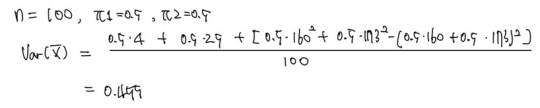

##### (b) 층화추출로 남성 표본 50개, 여성 표본 50개를 이용한 평균의 추정량 $(\bar{X}_{stratifited})$ 의 분산을 아래의 식을 이용하여 계산하시오.

(이 때, 모집단을 구성하는 남성과 여성의 비율은 같다고 한다.)

> $Var(\bar{X}_{stratifited}) = π_1^2Var(\bar{X_1}) + π_2^2Var(\bar{X_2}) = π_1^2{{σ_1^2}\over{n_1}} + π_2^2{{σ_2^2}\over{n_2}}$

이 때, $n, \bar{X}$은 표본의 크기와 표본평균을, $μ_1, μ_2, σ_1^2, σ_2^2$ 은 각각 여성의 키, 남성의 키의 모평균, 모분산을 나타내며, $π_1, π_2$는 모집단에서 여성과 남성의 비율을 나타내고, $n_1, n_2$는 여성의 키, 남성의 키의 층화추출 표본수를 나타낸다.

######**[sol]**  
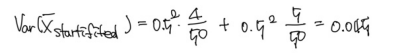

##### (c) 단순임의표본을 이용한 표본평균의 분산과 층화추출표본을 이용한 평균의 추정값의 분산을 비교하고, 층화추출의 의의를 간략히 서술하시오.

######**[sol]**  
단순 임의 표본을 이용한 표본 평균의 분산(0.455)보다 층화 추출 표본을 이용한 평균의 추정값의 분산(0.045)이 작음  
=> 층화 추출은 모집단을 여러 개의 층으로 나누어 각 층에서 표본을 추출하는 방식으로, 각 층에는 유사한 특성을 가진 관측치들이 모여있을 가능성이 크다.   
이는 표본 내에서의 변동성을 줄여줄수 있어, 추정값의 정확성을 높일수 있다.

#### 13.Bias, Variance 큰 모형
  * 다음의 모형 중 편이(bias)가 가장 큰 모형과 분산이 가장 큰 모형을 선택하고, 그 이유를 설명하시오.

  ![image](https://github.com/reiple/ds2_data_mining_hw/assets/6015403/005bcb38-9ea7-44e2-91a6-dd5afcdbcf58)

######**[sol]**

  * Bias-Variance Trade-off에서 Bias는 잘못된 가정을 했을 때 발성하는 오차. 모델이 복잡할수록 높아진다.
    * 따라서 가장 복잡한 모형은 (b) 모형 2이다.
  * Variance는 모델이 간단할수록 높아지는 값이므로, 가장 간단한 모형인 모형 1이 Variance가 높다.

####14.지도학습의 예를 드시오.

######**[sol]**
1) 자동차 번호판 인식 : 카메라로 촬영한 자동차 번호판을 인식하여 번호를 추출  
2) 목적지 도착 예상 시간 계산 : 네비게이션 등 길찾기 앱에서 특정 목적지까지의 이동하는데 걸리는 시간을 예측


지도 학습 알고리즘
1) 선형회귀
  로지스틱 회귀, 선형 판별 분석, k-최근접 이웃, 트리, 신경망, SVM
2) 분류

####15.층화추출법을 사용하는 예를 드시오.

######**[sol]**

####16.사후추출법을 사용하는 예를 드시오.

######**[sol]**

####17.원자료의 확률과 사후추출법 간의 관계

$X ∈ ℝ^p, Y ∈ {0,1}$ 이고 $P(X) := P(Y=1|X)$을 원자료에서 입력변수 $X$가 주어진 경우 $Y=1$일 확률이라하자.

$Q(X) := Q(Y=1|X)$은 사후추출법으로 추출된 자료에서 입력변수 $X$가 주어진 경우 $Y=1$일 확률이라하자.

원자료에서 $Y=0$인 자료의 수를 $N_0$, $Y=1$인 자료의 수를 $N_1$라 하고,

추출된 자료에서 $Y=0$인 자료의 수를 $n_0$, $Y=1$인 자료의 수를 $n_0$라 하자.

#####(1) 이 때, 다음이 성립함을 보이시오.


> ${{P(X)}\over{1-P(X)}} = {{Q(X)}\over{1-Q(X)}}{{N_1n_0}\over{N_0n_1}}$



######**[sol]**

#####(2) 위 식을 이용하여 두 개의 입력 변수 $X_1, X_2$에 대해서, $P(X_1) > P(X_2)$ 이면, $Q(X_1) > Q(X_2)$이고, 이에 대한 역도 성립함을 보이시오.

######**[sol]**

####18.위치 모수에 대한 검정 방법으로 t-검정과 부호검정, 윌콕슨 부호순위검정 등이 있다. 동일한 갑셍 대한 검정으로 이와 같이 다양한 검정이 존재하는 이유를 설명하시오.

######**[sol]**

####19.위치모수 μ에 대한 M-추정량의 정의를 서술하고, 아래의 명제를 증명하시오.


> 표본 평균이 위치모수 μ에 대한 M-추정량의 일종이 됨을 증명하시오. (Hint: $ρ(z) = z^2$)


######**[sol]**

관측된 자료 $(X_1, y_1), (X_2, y_2), ..., (X_n, y_n)$으로 주어질 때 M-추정량은 다음과 같이 정의한다.

$$ \hat\beta = \arg \min_\beta \sum_{i=1}^n \rho (r_i(\beta))$$

여기서 $r_i(\beta) = y_i - (\beta_0 + x_{i1}\beta_1 + x_{i2}\beta_2 + ... + x_{i\rho}\beta\rho)$ 인 잔차를 나타낸다.

$z$를 표본 관측치와 위치 모수 $\mu$의 차이라고 한다면,
$$z_i = x_i - \mu$$
$\rho$ 함수의 합을 최소화 하는 $\mu$를 찾는 것이므로, 위 식에 대입하면,
$$\sum_{i=1}^n \rho (z_i) = \sum_{i=1}^n \rho (x_i - \mu)$$
$\rho(z) = z^2$을 이용하여 식을 수정하면
$$\sum_{i=1}^n (x_i - \mu) ^2$$

이 값을 최소화 하는 $\mu$를 찾기 위해서 $\mu$에 대한 미분값이 0이 되어야 한다.
$$\frac{\partial}{\partial\mu}\sum_{i=1}^n (x_i - \mu)^2 = 0$$

미분하고 0으로 설정하면,
$$\frac{\partial}{\partial\mu} \sum_{i=1}^n (x_i - \mu) ^2 = \sum_{i=1}^n (2\mu - 2x_i) = 0$$

$$ 2n\mu - 2 \sum_{i=1}^n x_i = 0$$

$$ \mu = \frac{\sum_{i = 1}^n x_i}{n}$$

따라서 $\rho(z) = z^2$일 때, 표본 평균은 위치 모수 $\mu$에 대한 M-추정량이 된다.

#### 20.위치모수 추정

#####(1) 자유도가 3인 t분포에서 20개의 표본을 추출하시오.

In [27]:
import numpy as np
from scipy.stats import t

t_dat = t.rvs(df=3, size=20)

t_dat

array([-0.22168157, -0.01453888,  0.32423635, -0.11719042, -0.78693113,
       -0.1870676 ,  1.38070193, -0.99211167,  1.32625178, -0.33989121,
        1.36065203, -1.13867738,  0.05602729,  0.51484266, -1.50288418,
        1.32954338, -2.41465944,  0.54337298, -1.15086552, -0.25984376])

#####(2) (1)에서 추출된 표본을 이용하여 위치 모수를 추정하려고 한다.  
평균, 중앙값, 핫지스레만 일표본추정량(왈쉬평균들의 중앙값)을 이용하여 위치모수를 추정하시오.

[참고]   
왈쉬평균들의 중앙값
* 데이터를 일정한 크기의 작은 그룹으로 나누어 각 그룹에의 평균을 계산하고, 그 평균들의 중앙값을 구하는 방법
* 데이터의 변동이나 극단값에 덜 민감하게 평균을 추정하기 위한 방법으로 사용됨.

예를 들어, 데이터가 이상치나 극단값을 포함하고 있는 경우에는 일반적인 평균이나 중앙값을 사용하는 것보다 왈쉬평균들의 중앙값을 사용하면 더 정확한 추정을 얻을 수 있을 수 있음.

[참고]   
$\binom{k}{n} = \frac{k!}{(n-k)!} \cdot \frac{n!}{k!} = \frac{n!}{(n-k)! \cdot k!}$  
20개의 원소 중에서 2개의 원소를 갖는 조합의 경우의 수  
$\binom{20}{2} = \frac{2!}{(20-2)!} \cdot \frac{20!}{2!} = \frac{20 \times 19}{2} = 190$


In [28]:
import itertools

mean_estimate = np.mean(t_dat)
median_estimate = np.median(t_dat)

comb_arr1 = itertools.combinations(t_dat, 2)
# itertools.combinations(iterable, r) : iterable에서 r개의 원소로 이루어진 모든 조합(순서는 고려하지 않음)을 생성하는 generator임.
# 제너레이터는 값을 필요할 때마다 생성하는 느긋한 방식의 iterable이기 때문에, itertools.combinations 객체는 바로 배열로 변환할 수 없음
# list로 변환하면 제너레이터가 모든 값을 한 번에 생성하여 리스트로 저장하게 됨. 이후에는 리스트 안의 요소들을 numpy의 array 함수를 사용하여 배열로 변환

comb_arr1 = np.array(list(comb_arr1))
# len(list(comb_arr1))
# 190

walsh_avg = comb_arr1.mean(1) # mean 메서드에 인자 1을 넘겨주면 각 행의 평균을 계산
hodges_estimate = np.median(walsh_avg)

print('평균: ', mean_estimate, ', 중앙값: ', median_estimate, ', 핫지스레만 일표본추정량: ', hodges_estimate)


평균:  -0.11453571717298523 , 중앙값:  -0.15212901123724004 , 핫지스레만 일표본추정량:  -0.09455971996081287


#####(3) (1) ∼ (2) 과정을 100번씩 반복하시오.

In [29]:
results = []

for i in range(100):
  t_dat = t.rvs(df=3, size=20)

  mean_estimate = np.mean(t_dat)
  median_estimate = np.median(t_dat)

  comb_arr1 = np.array(list(itertools.combinations(t_dat, 2)))
  walsh_avg = comb_arr1.mean(1) # mean 메서드에 인자 1을 넘겨주면 각 행의 평균을 계산
  hodges_estimate = np.median(walsh_avg)

  results.append([mean_estimate, median_estimate, hodges_estimate])

results = np.array(results)
print(results)

[[ 0.12428919  0.32578113  0.26637091]
 [ 0.78899631  0.78775687  0.73616975]
 [ 0.35374115  0.74378872  0.68120408]
 [-0.01897613  0.41903888  0.07106651]
 [ 0.79602514  0.23398406  0.5596782 ]
 [ 0.0866669   0.00560404  0.06740792]
 [-0.94773411 -0.07313883 -0.18640943]
 [ 0.06517961  0.13432052  0.02632348]
 [ 0.2896637   0.23269392  0.18809376]
 [ 0.44860451  0.83973698  0.47468396]
 [-0.2642994  -0.20973977 -0.2071361 ]
 [ 0.02029872 -0.05217704 -0.0021343 ]
 [ 0.21485602 -0.0929073   0.10173093]
 [-0.40645367 -0.2592725  -0.26851717]
 [-0.19821782 -0.1513185  -0.1539585 ]
 [-0.62618741 -0.0024643  -0.15734301]
 [ 0.75292145  0.4179468   0.48058333]
 [ 0.25634104  0.1680305   0.22777833]
 [-0.12376234  0.12561435  0.09182327]
 [ 0.24726919  0.27382397  0.25847508]
 [ 0.2354996   0.0362774  -0.00750638]
 [ 0.122527    0.17629566  0.03482374]
 [ 0.37533107  0.2215839   0.35594349]
 [-0.13043795 -0.14604825 -0.16699981]
 [-0.41482227 -0.23954667 -0.35595822]
 [ 0.20500306  0.71636003

#####(4) (3)의 결과를 이용하여, 각 추정량에 대한 분산을 구하고 이를 비교하시오.

In [30]:
var_mean = np.var(results[:, 0])
var_median = np.var(results[:, 1])
var_hodges = np.var(results[:, 2])

print("평균 추정량의 분산:", var_mean)
print("Median 추정량의 분산:", var_median)
print("핫지스-레만 일표본 추정량의 분산", var_hodges)

평균 추정량의 분산: 0.12547070031478919
Median 추정량의 분산: 0.08160332041923865
핫지스-레만 일표본 추정량의 분산 0.07177127704182105


######**[sol]**

평균 추정량의 분산 > Median 추정량의 분산 > 핫지스-레만 일표본 추정량의 분산으로 데이터가 이상치나 극단값을 포함하고 있는 경우에는 일반적인 평균이나 중앙값을 사용하는 것보다 왈쉬평균들의 중앙값이 극단값에 덜 민감하게 평균값이 추정 된다.

#### 21.위치모수 검정
다음과 같이 주어진 데이터가 있다고 하자.

[0.302, 1.383, −0.281, −0.876, −0.759, −0.248, 0.009, 1.019, −0.935, 0.275,  
0.413, 0.438, −0.135, −0.091, 0.666, 0.877, −1.135, −1.02, −0.035, 0.353,  
− 1.05, 0.203, 0.43, 0.992, −0.058, −2.26, −0.532, 0.907, 1.3, 1.018]  

위치모수 µ에 대한 가설은 다음과 같다.  
  
$H_0 : \mu = 0 \quad \text{vs.} \quad H_1 : \mu \neq 0$

#####(1) t-검정과 wilcoxon 검정을 하시오.

In [31]:
import pandas as pd
from scipy.stats import ttest_1samp, wilcoxon

data = [0.302, 1.383, -0.281, -0.876, -0.759, -0.248, 0.009, 1.019, -0.935, 0.275,
        0.413, 0.438, -0.135, -0.091, 0.666, 0.877, -1.135, -1.02, -0.035, 0.353,
        -1.05, 0.203, 0.43, 0.992, -0.058, -2.26, -0.532, 0.907, 1.3, 1.018]

alpha = 0.05

# t-검정
t_statistic, t_pvalue = ttest_1samp(data, popmean=0)

if t_pvalue < alpha:
    print(f"t-검정의 p-value가 {t_pvalue:.4f}로 유의수준 {alpha}보다 작으므로 μ=0 이라는 귀무가설을 기각합니다.")
else:
  print(f"t-검정의 p-value가 {t_pvalue:.4f}로 유의수준 {alpha}보다 크므로 μ=0 이라는 귀무가설을 기각할 수 없습니다.")

# Wilcoxon 부호 순위 검정
wilcoxon_statistic, wilcoxon_pvalue = wilcoxon(data)

if wilcoxon_pvalue < alpha:
    print(f"Wilcoxon 부호 순위 검정의 p-value가 {wilcoxon_pvalue:.4f}로 유의수준 {alpha}보다 작으므로 μ=0 이라는 귀무가설을 기각합니다.")
else:
  print(f"Wilcoxon 부호 순위 검정의 p-value가 {wilcoxon_pvalue:.4f}로 유의수준 {alpha}보다 크므로 μ=0 이라는 귀무가설을 기각할 수 없습니다.")


t-검정의 p-value가 0.8024로 유의수준 0.05보다 크므로 μ=0 이라는 귀무가설을 기각할 수 없습니다.
Wilcoxon 부호 순위 검정의 p-value가 0.6408로 유의수준 0.05보다 크므로 μ=0 이라는 귀무가설을 기각할 수 없습니다.


#####(2) 기존 데이터에 이상치 [20, 20, 20, 20]을 추가한 후, t-검정과 wilcoxon 검정을 하시오.

In [32]:
import numpy as np

outlier = [20, 20, 20, 20]
new_data = np.concatenate([data, outlier])

alpha = 0.05

# t-검정
t_statistic, t_pvalue = ttest_1samp(new_data, popmean=0)

if t_pvalue < alpha:
    print(f"t-검정의 p-value가 {t_pvalue:.4f}로 유의수준 {alpha}보다 작으므로 μ=0 이라는 귀무가설을 기각합니다.")
else:
  print(f"t-검정의 p-value가 {t_pvalue:.4f}로 유의수준 {alpha}보다 크므로 μ=0 이라는귀무가설을 기각할 수 없습니다.")

# Wilcoxon 부호 순위 검정
wilcoxon_statistic, wilcoxon_pvalue = wilcoxon(new_data)

if wilcoxon_pvalue < alpha:
    print(f"Wilcoxon 부호 순위 검정의 p-value가 {wilcoxon_pvalue:.4f}로 유의수준 {alpha}보다 작으므로 μ=0 이라는 귀무가설을 기각합니다.")
else:
  print(f"Wilcoxon 부호 순위 검정의 p-value가 {wilcoxon_pvalue:.4f}로 유의수준 {alpha}보다 크므로 μ=0 이라는귀무가설을 기각할 수 없습니다.")

t-검정의 p-value가 0.0419로 유의수준 0.05보다 작으므로 μ=0 이라는 귀무가설을 기각합니다.
Wilcoxon 부호 순위 검정의 p-value가 0.1338로 유의수준 0.05보다 크므로 μ=0 이라는귀무가설을 기각할 수 없습니다.


#####(3) 검정결과 (1), (2)에 대해 논의하시오.

######**[sol]**
  * t-검정
    * p-value가 0.8024로 유의수준 0.05보다 크므로 μ=0 이라는 귀무가설을 기각할 수 없습니다.
    * 이상치 데이터를 추가한 이후 t-검정의 p-value가 0.0419로 유의수준 0.05보다 작으므로 μ=0 이라는 귀무가설을 기각합니다.
  * Wilcoxon 부호 순위 검정
    * p-value가 0.6408로 유의수준 0.05보다 크므로 μ=0 이라는 귀무가설을 기각할 수 없습니다.
    * 이상치 데이터를 추가한 이후에도 Wilcoxon 부호 순위 검정의 p-value가 0.1338로 유의수준 0.05보다 크므로 μ=0 이라는귀무가설을 기각할 수 없습니다.
  * 따라서 이 경우는 t-검정보다 Wilcoxon 부호 순위 검정이 이상치에 좀 더 강건하다고 할 수 있습니다.

####22.Three-sigma 규칙을 설명하고 이 규칙이 가질 수 있는 문제점과 보완책을 설명하시오.

######**[sol]**
  * 편차에서 양쪽으로 3 표준편차의 범위에 거의 자료들(99.7%)이 들어간다는 것을 나타낸다.
  * $\begin{vmatrix}\frac{ X_i - \bar{X}}{s}\end{vmatrix} > 3$인 $X_i$를 이상치로 정의하고 제거할 수 있다.
  * 문제점
    * 자료의 수가 많은 경우 이상치가 아니지만 Three-sigma 규칙을 적용하면 이상치로 잘못 판단할 수 있음
    * 자료의 수가 적은 경우 이상치를 찾아내지 못할 수 있음
    * 여러 개의 이상치가 존재할 때 표본표준편차 값이 거져 규칙이 좋지 않을 수 있음
  * 보완책
    * 아래와 같은 식을 이용하여 계산된 $t^\prime_i$를 이용하여 이상치 판단

  $t_i = \begin{vmatrix} \frac{X_i - \bar{X}}{s} \end{vmatrix}$ 대신 $t^\prime_i=\frac{X_i - median(X)}{MADN(X)}$

  $MADN(X) = MAD(X) / 0.6745$이다.
  
  $MAD(X) = median\begin{Bmatrix}|X_i - median(X)|\end{Bmatrix}$



####23.회귀모형에서 설명변수에 이상치가 포함되어 있는 경우, 문제점과 해결책을 제시하시오.

######**[sol]**